#Latar Belakang
Melihat potensi dari youtube yang semakin besar, sebuah perusahaan media yang dahulu berfokus pada pertelevisian berencana untuk ikut masuk ke ranah youtube. Pada kali, sebagai analis data yang memberikan saran untuk sebuah channel baru untuk sukses di ranah youtube.



##Rumusan Masalah
Untuk meminimalisir cost dan memaksimalkan exposure serta profit dari ads. Sehingga Biaya yang dikeluarkan minim dan jalannya channel berjalan strategis berdasarkan data driven decision. Maka,
1. Ingin mengetahui dimana saja yang paling prospektif dalam pembuatan konten
2. Seperti apa karakteristik dari video yang trending
3. Apa yang harus dilakukan untuk mendapatkan maksimal exposure

In [210]:
#Set working directory
import os
os.getcwd()
os.chdir('/Users/yudhapratama/Documents/Data Capstone 2')

##Landasan Teori
Berdasarkan dari Google selaku penyedia layanan YouTube, ada beberapa faktor yang mengakibatkan video Trending. Diantaranya : 

1. View count
2. How quickly the video is generating views (i.e. “temperature”)
3. Where views are coming from, including outside of YouTube
4. The age of the video
5. How the video performs compared to other recent uploads from the same channel

Gabungan dari beberapa aspek tersebut menjadikan suatu video dapat trending atau tidak. meskipun begitu, video dengan view terbanyak tidak menjamin akan menjadi #1 Trending di youtube.

Sumber : [Google, Youtube Support](https://support.google.com/youtube/answer/7239739?hl=en)

Selain daripada itu, beberapa penelitian terdahulu menyebutkan bahwa terdapat pengaruh lain yang mempengaruhi kinerja sebuah video. Diantaranya adalah video lifetime dan kolab. Sebuah video akan mengalami suatu siklus dimana video tersebut akan mengalami popularitas hingga akhirnya redup. Masa masa paling krusial sebuah video adalah pada 2 minggu pertama video tersebut ditayangkan. Selain itu, kolaborasi antar channel akan memberikan pengaruh signifikan terhadap viewers dan subsriber baru.

Pengaruh kolaborasi antar channel 
Our results show that collaborations are in many cases significantly beneficial regarding viewers and newly attracted subscribers for both collaborating channels, often showing more than 100% popularity growth compared with noncollaboration videos. (Koch, et all. 2018)

Video Lifetime
It is clear from this figure that these trending videos achieved about 80% of their popularity within the first two weeks of their lifetime.(Barjasteh, 2014)

In [212]:
#Import library yang diperlukan
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Tentang Data
Sebelum melaju lebih jauh, perlu mengenal dataset yang akan di analisa. Hal ini perlu karena untuk tau data bisa diapain aja, apa yang harus ditangani dan treatment apa yang pas untuk dilakukan pada data. 


In [213]:
#Membuka data
df = pd.read_csv('USvideos.csv')
df_js = pd.read_json('US_category_id.json')

## Data Understanding
Dataset ini berisikan catatan historis mengenai kumpulan konten youtube yang sedang trending/hari

Sebanyak 40949 data atas beberapa bulan pengamatan video yang trending. Tiap entitas video memiliki keterangan mengenai judul, channel, waktu upload dan informasi numerik pada hari pengamatan. Up to 200 catatan historis video yang trending/hari
### Variabel Data
1. video_id : nomor unik dari setiap video
2. Title : Judul dari video
3. channel title : Nama channel
4. publish time : waktu ketika video tersebut di-upload 
5. tags : penanda 
6. views : jumlah dari penonton 
7. likes : jumlah user yang menekan tombol 'likes'
8. dislikes : jumlah user yang menekan tombol 'dislike', 
9. description : isi dari kolom deskripsi 
10. comment count : jumlah dari user yang mengisi kolom komentar
+Data terpisah dari **file JSON.** untuk kategori (32 x 3)



In [214]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [216]:
df_js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    32 non-null     object
 1   etag    32 non-null     object
 2   items   32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


##Behind the data
Data ini diambil dengan menggunakan metode *scrapping* terhadap video-video yang sedang menjadi trending di youtube dalam jangka waktu tertentu. (lihat bagian *trending youtube scrapper*).
Maka, hal yang dapat dilakukan adalah mengidentifikasi karakteristik karaktersistik dari video yang **telah** menjadi trending. Oleh karena itu, tidak relevan untuk mengkategorikan suatu video trending atau tidak. karena data yang disuguhkan merupakan kumpulan video yang sedang trending pada hari tersebut.

In [217]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight"
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://instagram.com/calebnatale\n\nPA:\nPaulina Gregory\n\n\nShots Studios Channels:\nAle

In [218]:
df_js.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}"
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI""', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}"
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec""', 'id': '17', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Sports', 'assignable': True}}"


###Trending YouTube *Video Scraper*

Originally used to build this dataset on Kaggle, which has about 6 months worth of trending YouTube videos on it. This script will scrape the most relevant information from videos that are currently trending on YouTube in a specified set of countries. You can find example output files in the output directory.

Data ini diambil dari menggunakan metode scrapper terhadap video-video yang sedang menjadi trending di youtube,
Maka dari itu, tugasnya adalah mengidentifikasi karakteristik karaktersistik dari video yang telah menjadi trending
Maka dari itu, tidak relevan untuk menjustifikasi suatu video trending atau tidak

Source = https://github.com/mitchelljy/Trending-YouTube-Scraper

### Dari hampir 50 ribu data, terdapat beberapa hal yang dapat disimpulkan :
Ada 6351 video berbeda
251 hari, atau hampir 9 bulan data terkumpul
2200 channel yang berbeda
16 kategori yang  berbeda
Variabel Numerik terdiri dari views, likes, dislikes & column_count
Terdapat boolean values pada kolom karakteristik video(menyalakan komentar atau tidak, rating disabled atau tidak, video diremoved atau tidak)

# Data Prep dan Cleansing

## Missing Value

### Kolom Deskripsi
Pada kolom deskripsi terdapat missing value. Kali ini tidak akan di hapus karena masih membutuhkan value lainnya dalam kolom berdata kosong tersebut. Pengisian kolom missing value menggunakan pengubahan value atau dinamakan...

In [219]:
df["description"] = df["description"].fillna(value="Tidak ada deskripsi")
df[df['description']=='Tidak ada deskripsi']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,Tidak ada deskripsi
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in China,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,Tidak ada deskripsi
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,Tidak ada deskripsi
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,Tidak ada deskripsi
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in China,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,Tidak ada deskripsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40125,1h7KV2sjUWY,18.10.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1021063,58806,376,3903,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,Tidak ada deskripsi
40325,1h7KV2sjUWY,18.11.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1024052,58862,377,3904,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,Tidak ada deskripsi
40538,1h7KV2sjUWY,18.12.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1029290,58980,377,3931,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,Tidak ada deskripsi
40739,1h7KV2sjUWY,18.13.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1034480,59090,379,3927,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,Tidak ada deskripsi


##Correcting Data *Type*

Memperbaiki data type kolom yang berkaitan dengan waktu. Memecah kolom trending date, sehingga bisa siap digunakan untuk analisis berikutnya menggunakan time delta.

In [220]:
df['trending_date'] = pd.to_datetime(df['trending_date'],errors='coerce', format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [221]:
#memisahkan kolom waktu saat video diupload
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2017-11-13,17:13:01
1,2017-11-13,07:30:00
2,2017-11-12,19:05:24
3,2017-11-13,11:00:04
4,2017-11-12,18:01:41


In [222]:
df[['trending_date','publish_time']]

,trending_date,publish_time
0,2017-11-14,17:13:01
1,2017-11-14,07:30:00
2,2017-11-14,19:05:24
3,2017-11-14,11:00:04
4,2017-11-14,18:01:41
...,...,...
40944,2018-06-14,13:00:04
40945,2018-06-14,01:00:06
40946,2018-06-14,17:34:22
40947,2018-06-14,17:00:04


In [223]:
#Mengubah datatype publish_date agar dapat diolah lebih lanjut
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce', format='%Y-%m-%dT')

In [224]:
#Recheck apakah ada null value
df = df[df['trending_date'].notnull()]
df = df[df['publish_time'].notnull()]

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   publish_date            40949 non-null  datetime64[ns]
 5   category_id             40949 non-null  int64         
 6   publish_time            40949 non-null  object        
 7   tags                    40949 non-null  object        
 8   views                   40949 non-null  int64         
 9   likes                   40949 non-null  int64         
 10  dislikes                40949 non-null  int64         
 11  comment_count           40949 non-null  int64         
 12  thumbnail_link          40949 non-null  object

Mengubah tipe data kolom category_id 

In [226]:
df['category_id'] = df['category_id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   publish_date            40949 non-null  datetime64[ns]
 5   category_id             40949 non-null  object        
 6   publish_time            40949 non-null  object        
 7   tags                    40949 non-null  object        
 8   views                   40949 non-null  int64         
 9   likes                   40949 non-null  int64         
 10  dislikes                40949 non-null  int64         
 11  comment_count           40949 non-null  int64         
 12  thumbnail_link          40949 non-null  object

Mengecek unique values tiap kolom sebelum tabel tabel ditransformasi menjadi beberapa tabel berbeda

In [227]:
#Sebelum Transformasi
pd.set_option('display.max_colwidth',-1)
####
unix = []
for col in df.columns:
  unix.append( [col, df[col].nunique(),df[col].unique()])
tabelUn = pd.DataFrame(data=unix, columns=['namaKolom','n unix', 'values'])
tabelUn

/var/folders/gn/wnh0cvb12rgb1y0ptnlzw6280000gn/T/ipykernel_63985/1057188968.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


namaKolom  n unix  \
0   video_id                6351     
1   trending_date           205      
2   title                   6455     
3   channel_title           2207     
4   publish_date            313      
5   category_id             16       
6   publish_time            4478     
7   tags                    6055     
8   views                   40478    
9   likes                   29850    
10  dislikes                8516     
11  comment_count           13773    
12  thumbnail_link          6352     
13  comments_disabled       2        
14  ratings_disabled        2        
15  video_error_or_removed  2        
16  description             6902     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## Menggabungakan Kategori dari file yang berbeda
### membuka file .json

In [228]:
import json
jembatan = {}

with open('/Users/yudhapratama/Documents/Data Capstone 2/US_category_id.json', 'r') as i:
    data = json.load(i)
    for category in data['items']:
        jembatan[category['id']] = category['snippet']['title']

jembatan

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [229]:
df.insert(4, 'kategori', df['category_id'].map(jembatan))

In [230]:
df[['category_id', 'kategori']].head()

,category_id,kategori
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
3,24,Entertainment
4,24,Entertainment


In [231]:
df.drop(columns='category_id') #Kolom category_id dihapus karena sudah digantikan dengan 'kategori'

,video_id,trending_date,title,channel_title,kategori,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,Entertainment,2017-11-13,07:30:00,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight"
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,Comedy,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://instagram.com/calebnatale\n\nPA:\nPaulina Gregory\n\n\n

In [232]:
df.head()

,video_id,trending_date,title,channel_title,kategori,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,Entertainment,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight"
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,Comedy,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://instagram.com/calebnatale\n\nPA:\n

In [233]:
df[df['video_id']=='d380meD0W0M']#recheck

,video_id,trending_date,title,channel_title,kategori,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""idy""|""rhpc""|""dares""|""no truth""|""comments""|""comedy""|""funny""|""stupid""|""fail""",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,"I know it's been a while since we did this show, but we're back with what might be the best episode yet!\nLeave your dares in the comment section! \n\nOrder my book how to write good \nhttp://higatv.com/ryan-higas-how-to-write-good-pre-order-links/\n\nJust Launched New Official Store\nhttps://www.gianthugs.com/collections/ryan\n\nHigaTV Channel\nhttp://www.youtube.com/higatv\n\nTwitter\nhttp://www.twitter.com/therealryanhiga\n\nFacebook\nhttp://www.facebook.com/higatv\n\nWebsite\nhttp://www.higatv.com\n\nInstagram\nhttp://www.instagram.com/notryanhiga\n\nSend us mail or whatever you want here!\nPO Box 232355\nLas Vegas, NV 89105"
247,d380meD0W0M,2017-11-15,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""idy""|""rhpc""|""dares""|""no truth""|""comments""|""comedy""|""funny""|""stupid""|""fail""",2509626,144816,2262,18893,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,"I know it's been a while since we did this show, but we're back with what might be the best episode yet!\nLeave your dares in the comment section! \n\nOrder my book how to write good \nhttp://higatv.com/ryan-higas-how-to-write-good-pre-order-links/\n\nJust Launched New Official Store\nhttps://www.gianthugs.com/collections/ryan\n\nHigaTV Channel\nhttp://www.youtube.com/higatv\n\nTwitter\nhttp://www.twitter.com/therealryanhiga\n\nFacebook\nhttp://www.facebook.com/higatv\n\nWebsite\nhttp://www.higatv.com\n\nInstagram\nhttp://www.instagram.com/notryanhiga\n\nSend us mail or whatever you want here!\nPO Box 232355\nLas Vegas, NV 89105"
484,d380meD0W0M,2017-11-16,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""idy""|""rhpc""|""dares""|""no truth""|""comments""|""comedy""|""funny""|""stupid""|""fail""",2584165,147110,2305,19313,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,"I know it's been a while since we did this show, but we're back with what might be the best episode yet!\nLeave your dares in the comment section! \n\nOrder my book how to write good \nhttp://higatv.com/ryan-higas-how-to-write-good-pre-order-links/\n\nJust Launched New Official Store\nhttps://www.gianthugs.com/collections/ryan\n\nHigaTV Channel\nhttp://www.youtube.com/higatv\n\nTwitter\nhttp://www.twitter.com/therealryanhiga\n\nFacebook\nhttp://www.facebook.com/higatv\n\nWebsite\nhttp://www.higatv.com\n\nInstagram\nhttp://www.instagram.com/notryanhiga\n\nSend us mail or whatever you want here!\nPO Box 232355\nLas Vegas, NV 89105"
722,d380meD0W0M,2017-11-17,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""idy""|""rhpc""|""dares""|""no truth""|""comments""|""comedy""|""funny""|""stupid""|""fail""",2656622,149105,2339,19644,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,"I know it's been a while since we did this show, but we're back with what might be the best episode yet!\nLeave your dares in the comment section! \n\nOrder my book how to write good \nhttp://higatv.com/ryan-higas-how-to-write-good-pre-order-links/\n\nJust Launched New Official Store\nhttps://www.gianthugs.com/collections/ryan\n\nHigaTV Channel\nhttp://www.youtube.com/higatv\n\nTwitter\nhttp://www.twitter.com/therealryanhiga\n\nFacebook\nhttp://www.facebook.com/higatv\n\nWebsite\nhttp://www.higatv.com\n\nInstag

###Mengekspor data yang sudah diproses sebagai back-up

In [234]:
#Tabel yang sudah diproses dibuat sebagai variabel baru.just in case, kedepan memerlukan analisa dataset yang full tanpa dilakukan transformasi
us_trends = df.copy()
us_trends.head()
us_trends.to_excel('us_trends.xlsx')

/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/xlsxwriter/worksheet.py:1170: UserWarning: Ignoring URL 'http://readyplayeronemovie.com\nhttp://facebook.com/readyplayerone\nhttp://twitter.com/readyplayerone\nhttp://instagram.com/readyplayerone\n\n--%20\n\nFrom%20filmmaker%20Steven%20Spielberg%20comes%20the%20science%20fiction%20action%20adventure%20“Ready%20Player%20One,”%20based%20on%20Ernest%20Cline’s%20bestseller%20of%20the%20same%20name,%20which%20has%20become%20a%20worldwide%20phenomenon.%20\n\nThe%20film%20is%20set%20in%202045,%20with%20the%20world%20on%20the%20brink%20of%20chaos%20and%20collapse.%20%20But%20the%20people%20have%20found%20salvation%20in%20the%20OASIS,%20an%20expansive%20virtual%20reality%20universe%20created%20by%20the%20brilliant%20and%20eccentric%20James%20Halliday%20(Mark%20Rylance).%20%20When%20Halliday%20dies,%20he%20leaves%20his%20immense%20fortune%20to%20the%20first%20person%20to%20find%20a%20digital%20Easter%20egg%20he%20has%20hidden%20somewh

##Memecah data menjadi beberapa DataFrame Baru

### Data akan dipecah sesuai dengan kebutuhan analisa. 
Kali ini saya akan memecah data yang sudah diproses 'us_trens' menjadi beberapa dataframe baru. Karena data yang dimiliki merupakan hasil dari observasi/hari. Maka akan banyak sekali video duplikat. Mengingat datu video bisa jadi muncul lebih dari satu hari. saya akan menghapus video duplikan dan tetap menyisakan video yang terakhir muncul untuk menganalisa data numerik karena berisikan jumlah akumulasi angka ter-update(contoh : views, likes, comment_count). Sedangkan saya akan menyisakan video yang pertama muncul untuk analisa waktu yang dibutuhkan untuk mencapai trending

####Dataframe baru tanpa duplikat A
Dataframe ini digunakan untuk menganalisa waktu yang dibutuhkan untuk mencapai trending. Data yang tetap tinggal adalah data pertama karena yang akan dihitung adalah selisih waktu video tersebut di upload dan muncul pada trending. Disini juga akan diterapkan filtering untuk benar benar mendapatkan data selisih yang relevan.

In [235]:
#Membuat dataframe baru dengan mensortir tanggal trending, menghapus video duplikat selain yang pertama dan membuat video_id sebagai index
tr_b = df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='first').set_index('video_id')

In [236]:
tr_b[tr_b['title']=='WE WANT TO TALK ABOUT OUR MARRIAGE']

,index,trending_date,title,channel_title,kategori,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,,,
2kyS6SvSYSE,0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.


In [237]:
tr_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, 2kyS6SvSYSE to yz7Xq3T0YPs
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6351 non-null   int64         
 1   trending_date           6351 non-null   datetime64[ns]
 2   title                   6351 non-null   object        
 3   channel_title           6351 non-null   object        
 4   kategori                6351 non-null   object        
 5   publish_date            6351 non-null   datetime64[ns]
 6   category_id             6351 non-null   object        
 7   publish_time            6351 non-null   object        
 8   tags                    6351 non-null   object        
 9   views                   6351 non-null   int64         
 10  likes                   6351 non-null   int64         
 11  dislikes                6351 non-null   int64         
 12  comment_count           6351 non-nul

Mendapatkan selisih waktu dari saat video di-upload hingga menjadi trending

In [238]:
tr_b['waktuygDiperlukan'] = tr_b['trending_date'] - tr_b['publish_date']

In [239]:
tr_b['waktuygDiperlukan']

video_id
2kyS6SvSYSE   1 days
htvR_dBs3eg   4 days
qEEtzzi1EII   5 days
1Wk8ZRgXQnY   5 days
8l_e6bx8UG8   6 days
               ...  
dS5Thrl-4Kc   2 days
JGm9Y_hFqNk   1 days
6h8QgZF5Qu4   1 days
mpnshdmtE2Y   2 days
yz7Xq3T0YPs   1 days
Name: waktuygDiperlukan, Length: 6351, dtype: timedelta64[ns]

In [240]:
###Membulatkan waktu yang diperlukan
tr_b['waktuygDiperlukan'].dt.round('24min')

video_id
2kyS6SvSYSE   1 days
htvR_dBs3eg   4 days
qEEtzzi1EII   5 days
1Wk8ZRgXQnY   5 days
8l_e6bx8UG8   6 days
               ...  
dS5Thrl-4Kc   2 days
JGm9Y_hFqNk   1 days
6h8QgZF5Qu4   1 days
mpnshdmtE2Y   2 days
yz7Xq3T0YPs   1 days
Name: waktuygDiperlukan, Length: 6351, dtype: timedelta64[ns]

Memfilter video yang diupload sebelum hari observasi. Karena ditakutkan selisih waktu yang didapatkan tidak relevan.

In [241]:
filtered_tr_b = tr_b.loc[(tr_b['publish_date'] > '2017-11-13')]
tr_b.info()
filtered_tr_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, 2kyS6SvSYSE to yz7Xq3T0YPs
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   index                   6351 non-null   int64          
 1   trending_date           6351 non-null   datetime64[ns] 
 2   title                   6351 non-null   object         
 3   channel_title           6351 non-null   object         
 4   kategori                6351 non-null   object         
 5   publish_date            6351 non-null   datetime64[ns] 
 6   category_id             6351 non-null   object         
 7   publish_time            6351 non-null   object         
 8   tags                    6351 non-null   object         
 9   views                   6351 non-null   int64          
 10  likes                   6351 non-null   int64          
 11  dislikes                6351 non-null   int64          
 12  comment_count         

#### Dataframe baru tanpa duplikat B
Dataframe ini digunakan untuk menganalisa variabel numerik seperti jumlah view, comment_count, likes & dislike. Data yang tetap tinggal adalah data terakhir karena memiliki jumlah terupdate.

In [242]:
#membuat dataframe baru yang tanpa duplikat, simpan paling terakhir karena berisi nilai numerik termutakhir
tr = df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')

In [243]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, htvR_dBs3eg to ooyjaVdt-jA
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6351 non-null   int64         
 1   trending_date           6351 non-null   datetime64[ns]
 2   title                   6351 non-null   object        
 3   channel_title           6351 non-null   object        
 4   kategori                6351 non-null   object        
 5   publish_date            6351 non-null   datetime64[ns]
 6   category_id             6351 non-null   object        
 7   publish_time            6351 non-null   object        
 8   tags                    6351 non-null   object        
 9   views                   6351 non-null   int64         
 10  likes                   6351 non-null   int64         
 11  dislikes                6351 non-null   int64         
 12  comment_count           6351 non-nul

In [244]:
tr[tr['trending_date']=='2017-11-14']

,index,trending_date,title,channel_title,kategori,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,,,
htvR_dBs3eg,127,2017-11-14,Sam Smith - The Thrill of It All ALBUM REVIEW,theneedledrop,Music,2017-11-10,10,21:38:57,"album|""review""|""music""|""reviews""|""indie""|""underground""|""new""|""latest""|""lyrics""|""full song""|""listen""|""track""|""concert""|""live""|""performance""|""update""|""the needle drop""|""anthony fantano""|""vlog""|""talk""|""discussion""|""music nerd""|""pop""|""soul""|""sam smith""|""the thrill of it all""|""in the lonely hour""|""too good at goodbyes""|""say it first""|""pray""|""london""",98422,2926,106,798,https://i.ytimg.com/vi/htvR_dBs3eg/default.jpg,False,False,False,"Listen: https://www.youtube.com/watch?v=J_ub7Etch2U&ab_channel=SamSmithWorldVEVO\n\nUK pop singer Sam Smith's latest album turns blue-eyed soul into a chore.\n\nMore pop reviews: https://www.youtube.com/playlist?list=PLP4CSgl7K7oqibt_5oDPppWxQ0iaxyyeq?&ab_channel=theneedledrop\n\nBuy this album: http://amzn.to/2yrBJZT\n\n===================================\nSubscribe: http://bit.ly/1pBqGCN\n\nOfficial site: http://theneedledrop.com\n\nTND Twitter: http://twitter.com/theneedledrop\n\nTND Facebook: http://facebook.com/theneedledrop\n\nSupport TND: http://theneedledrop.com/support\n===================================\n\nFAV TRACKS: TOO GOOD AT GOODBYES, HIM\n\nLEAST FAV TRACK: SAY IT FIRST\n\nSAM SMITH - THE THRILL OF IT ALL / 2017 / CAPITOL / POP SOUL\n\n4/10\n\nY'all know this is just my opinion, right?"
5x1FAiIq_pQ,136,2017-11-14,Alicia Keys - When You Were Gone,Alicia Keys,Music,2017-11-09,10,15:49:21,[none],95944,1354,181,117,https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg,False,False,False,"Find out more in The Vault: http://bit.ly/AK_AsIAm10\nCelebrating the anniversary of one of my favorite albums “As I Am”!! 🎉🎉🎉 “When You Were Gone” is one of the VERY first songs recorded for As I Am, the one where I started to create the sound that the album has. We were experimenting with a lot of keyboards and sounds and styles of recording, and we were all about breaking boundaries and writing things in new ways."
vd4zwINEcLY,139,2017-11-14,Live in the now!,poofables,Entertainment,2011-03-27,24,04:31:25,"cash|""Wayne's""|""World""|""wayne""|""waynes""|""fender""|""strat""|""stratocaster""|""cassandra""",95085,909,52,193,https://i.ytimg.com/vi/vd4zwINEcLY/default.jpg,False,False,False,"Stop torturing yourself man, you'll never afford it. Live in the now!"
7fm7mll2qvg,140,2017-11-14,Sigrid - Strangers (Lyric Video),SigridVEVO,Music,2017-11-10,10,00:00:00,"Sigrid|""Strangers""|""Island""|""Records""|""Pop""",91776,4604,46,357,https://i.ytimg.com/vi/7fm7mll2qvg/default.jpg,False,False,False,Listen to Strangers here: https://Sigrid.lnk.to/StrangersID\n\nMusic video by Sigrid performing Strangers. (C) 2017 Universal Music Operations Limited\n\nhttp://vevo.ly/PE6pLX
q-WipZ9p0wk,143,2017-11-14,Three meals that cost me $1.50 each,Brothers Green Eats,Howto & Style,2017-11-09,26,14:00:08,"brothers green eats|""budget cooking""|""cooking for the price of coffee""|""banana pancakes""|""falafel""|""cabbage rolls""|""steamed cabbage rolls""|""homemade almond milk""|""oat flour""|""homemade""|""recipe""|""cooking""|""simple cooking""|""simple recipes""|""budget cooking recipes""|""budget recipes""|""apple compote""|""apple jam""|""pear compote""",77630,1991,83,208,https://i.ytimg.com/vi/q-WipZ9p0wk/default.jpg,False,False,False,Welcome to day three of cooking for the price of coffee. \nClick here to get a taste of my epic podcast: https://anchor.fm/youenjoylife?at=993145\n\nCheck out day one of the challenge here: https://www.youtube.com/watch?v=zjeY6Bzg6jw\nCheck out day two of the challenge here: https://www.youtube.com/watch?v=qNB-7fHCVKk\n\n\n\nmusic by Blue Wednesday\nhttps://soundcloud.com/bluewednesday
...,...

In [245]:
tr.head()

,index,trending_date,title,channel_title,kategori,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,,,
htvR_dBs3eg,127,2017-11-14,Sam Smith - The Thrill of It All ALBUM REVIEW,theneedledrop,Music,2017-11-10,10,21:38:57,"album|""review""|""music""|""reviews""|""indie""|""underground""|""new""|""latest""|""lyrics""|""full song""|""listen""|""track""|""concert""|""live""|""performance""|""update""|""the needle drop""|""anthony fantano""|""vlog""|""talk""|""discussion""|""music nerd""|""pop""|""soul""|""sam smith""|""the thrill of it all""|""in the lonely hour""|""too good at goodbyes""|""say it first""|""pray""|""london""",98422,2926,106,798,https://i.ytimg.com/vi/htvR_dBs3eg/default.jpg,False,False,False,"Listen: https://www.youtube.com/watch?v=J_ub7Etch2U&ab_channel=SamSmithWorldVEVO\n\nUK pop singer Sam Smith's latest album turns blue-eyed soul into a chore.\n\nMore pop reviews: https://www.youtube.com/playlist?list=PLP4CSgl7K7oqibt_5oDPppWxQ0iaxyyeq?&ab_channel=theneedledrop\n\nBuy this album: http://amzn.to/2yrBJZT\n\n===================================\nSubscribe: http://bit.ly/1pBqGCN\n\nOfficial site: http://theneedledrop.com\n\nTND Twitter: http://twitter.com/theneedledrop\n\nTND Facebook: http://facebook.com/theneedledrop\n\nSupport TND: http://theneedledrop.com/support\n===================================\n\nFAV TRACKS: TOO GOOD AT GOODBYES, HIM\n\nLEAST FAV TRACK: SAY IT FIRST\n\nSAM SMITH - THE THRILL OF IT ALL / 2017 / CAPITOL / POP SOUL\n\n4/10\n\nY'all know this is just my opinion, right?"
5x1FAiIq_pQ,136,2017-11-14,Alicia Keys - When You Were Gone,Alicia Keys,Music,2017-11-09,10,15:49:21,[none],95944,1354,181,117,https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg,False,False,False,"Find out more in The Vault: http://bit.ly/AK_AsIAm10\nCelebrating the anniversary of one of my favorite albums “As I Am”!! 🎉🎉🎉 “When You Were Gone” is one of the VERY first songs recorded for As I Am, the one where I started to create the sound that the album has. We were experimenting with a lot of keyboards and sounds and styles of recording, and we were all about breaking boundaries and writing things in new ways."
vd4zwINEcLY,139,2017-11-14,Live in the now!,poofables,Entertainment,2011-03-27,24,04:31:25,"cash|""Wayne's""|""World""|""wayne""|""waynes""|""fender""|""strat""|""stratocaster""|""cassandra""",95085,909,52,193,https://i.ytimg.com/vi/vd4zwINEcLY/default.jpg,False,False,False,"Stop torturing yourself man, you'll never afford it. Live in the now!"
7fm7mll2qvg,140,2017-11-14,Sigrid - Strangers (Lyric Video),SigridVEVO,Music,2017-11-10,10,00:00:00,"Sigrid|""Strangers""|""Island""|""Records""|""Pop""",91776,4604,46,357,https://i.ytimg.com/vi/7fm7mll2qvg/default.jpg,False,False,False,Listen to Strangers here: https://Sigrid.lnk.to/StrangersID\n\nMusic video by Sigrid performing Strangers. (C) 2017 Universal Music Operations Limited\n\nhttp://vevo.ly/PE6pLX
q-WipZ9p0wk,143,2017-11-14,Three meals that cost me $1.50 each,Brothers Green Eats,Howto & Style,2017-11-09,26,14:00:08,"brothers green eats|""budget cooking""|""cooking for the price of coffee""|""banana pancakes""|""falafel""|""cabbage rolls""|""steamed cabbage rolls""|""homemade almond milk""|""oat flour""|""homemade""|""recipe""|""cooking""|""simple cooking""|""simple recipes""|""budget cooking recipes""|""budget recipes""|""apple compote""|""apple jam""|""pear compote""",77630,1991,83,208,https://i.ytimg.com/vi/q-WipZ9p0wk/default.jpg,False,False,False,Welcome to day three of cooking for the price of coffee. \nClick here to get a taste of my epic podcast: https://anchor.fm/youenjoylife?at=993145\n\nCheck out day one of the challenge here: https://www.youtube.com/watch?v=zjeY6Bzg6jw\nCheck out day two of the challenge here: https://www.youtube.com/watch?v=qNB-7fHCVKk\n\n\n\nmusic by Blue Wednesday\nhttps://soundcloud.com/bluewednesday


In [246]:
tr[['publish_date','publish_time']].head()

,publish_date,publish_time
video_id,,
htvR_dBs3eg,2017-11-10,21:38:57
5x1FAiIq_pQ,2017-11-09,15:49:21
vd4zwINEcLY,2011-03-27,04:31:25
7fm7mll2qvg,2017-11-10,00:00:00
q-WipZ9p0wk,2017-11-09,14:00:08


In [247]:
tr[['views','likes','dislikes','comment_count']].describe()

,views,likes,dislikes,comment_count
count,6.351000e+03,6.351000e+03,6.351000e+03,6.351000e+03
mean,1.962117e+06,5.557505e+04,3.067153e+03,6.450745e+03
std,7.060057e+06,1.938307e+05,3.198849e+04,3.382370e+04
min,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.591565e+05,2.772500e+03,1.270000e+02,3.720000e+02
50%,5.181070e+05,1.190600e+04,4.440000e+02,1.266000e+03
75%,1.473582e+06,3.842850e+04,1.507000e+03,4.061500e+03
max,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


# DATA ANALYSIS

##Statistik deskriptif

In [248]:
#menggunakan dataframe dengan data numerik terupdate
tr.describe()

,index,views,likes,dislikes,comment_count
count,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6.351000e+03
mean,17064.948355,1.962117e+06,5.557505e+04,3.067153e+03,6.450745e+03
std,11517.614940,7.060057e+06,1.938307e+05,3.198849e+04,3.382370e+04
min,10.000000,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,7179.500000,1.591565e+05,2.772500e+03,1.270000e+02,3.720000e+02
50%,15363.000000,5.181070e+05,1.190600e+04,4.440000e+02,1.266000e+03
75%,25552.500000,1.473582e+06,3.842850e+04,1.507000e+03,4.061500e+03
max,40948.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


## Uji Statistik

In [251]:
from scipy.stats import normaltest

In [252]:

dp_statistic, dp_pvalue = normaltest(tr['comment_count'])
print(dp_statistic,dp_pvalue)
if dp_pvalue > 0.05:
    print('menerima H0, data terdistribusi normal')
else:
    print('menolak H0, data tidak terdistribusi normal')

15119.135160146943 0.0
menolak H0, data tidak terdistribusi normal


In [253]:
dp_statistic, dp_pvalue = normaltest(tr['likes'])
print(dp_statistic,dp_pvalue)
if dp_pvalue > 0.05:
    print('menerima H0, data terdistribusi normal')
else:
    print('menolak H0, data tidak terdistribusi normal')

11218.451474066711 0.0
menolak H0, data tidak terdistribusi normal


In [254]:
dp_statistic, dp_pvalue = normaltest(tr['views'])
print(dp_statistic,dp_pvalue)
if dp_pvalue > 0.05:
    print('menerima H0, data terdistribusi normal')
else:
    print('menolak H0, data tidak terdistribusi normal')

11910.61179034592 0.0
menolak H0, data tidak terdistribusi normal


In [255]:
dp_statistic, dp_pvalue = normaltest(tr['dislikes'])
print(dp_statistic,dp_pvalue)
if dp_pvalue > 0.05:
    print('menerima H0, data terdistribusi normal')
else:
    print('menolak H0, data tidak terdistribusi normal')

19269.796809359457 0.0
menolak H0, data tidak terdistribusi normal


Dari hasil uji statistik terlihat bahwa variabel comment_count, views, likes dan dislikes tidak terdistribusi normal. Berikutnya akan divisualisasikan distribusi datanya.

## Mengetahui prospek kategori

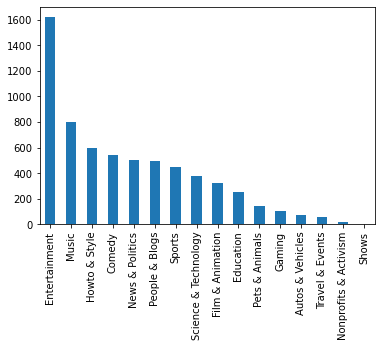

In [256]:
jml_percat = tr['kategori'].value_counts() # frequency for each category
jml_percat
g_pr = jml_percat.plot.bar()

Setelah dilihat, kategori yang paling sering muncul adalah entertainment, disusul oleh Music dan Howto & Style. Artinya , user di amerika memiliki prefernsi menggukan youtube untuk kepentingan hiburan/melepas penat dan juga tutuorial. Setelah itu kita ingin mencari tahu video apa yang paling menonjol di tiap kategorinya berdasarkan likes.

In [257]:
tr[tr['kategori']=='Music'][['title','kategori','views','likes','comment_count']].sort_values('views',ascending=False).head(5)

,title,kategori,views,likes,comment_count
video_id,,,,,
VYOjWnS4cMY,Childish Gambino - This Is America (Official Video),Music,225211923,5023450,517232
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,Music,148689896,3094021,242039
zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official Video)",Music,139334502,1425496,83941
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,123010920,5613827,1228655
M4ZoCHID9GI,The Weeknd - Call Out My Name (Official Video),Music,122544931,1427436,55320


In [258]:
tr[tr['kategori']=='Howto & Style'][['title','kategori','views','likes','comment_count']].sort_values('views',ascending=False).head(5)

,title,kategori,views,likes,comment_count
video_id,,,,,
_9YMpuLDnwo,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,Howto & Style,54155921,378111,24679
WyZz9muaKFc,I Got 99 Problems But Being A Girl Ain't One! DIY Girls Hacks and More by Blossom,Howto & Style,21211851,114989,5264
KONe4SNFA64,Rihanna's Epic 10-Minute Guide to Going Out Makeup | Beauty Secrets | Vogue,Howto & Style,9233435,605954,26319
Dan2YMDCpms,Blind Girl Describes My Face to a Police Sketch Artist!,Howto & Style,8261252,364224,25064
Jw1Y-zhQURU,John Lewis Christmas Ad 2017 - #MozTheMonster,Howto & Style,8041928,60434,7545


In [259]:
tr[tr['kategori']=='Entertainment'][['title','kategori','views','likes','comment_count']].sort_values('views',ascending=False).head(5)

,title,kategori,views,likes,comment_count
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRewind,Entertainment,149376127,3093544,810698
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Official Trailer,Entertainment,91933007,2625661,350458
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Entertainment,59254638,1295189,139879
QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Official Trailer,Entertainment,52404970,1565579,194290
rRr1qiJRsXk,Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani,Entertainment,48654951,811144,48941


##Visualisasi distribusi data melalui histogram

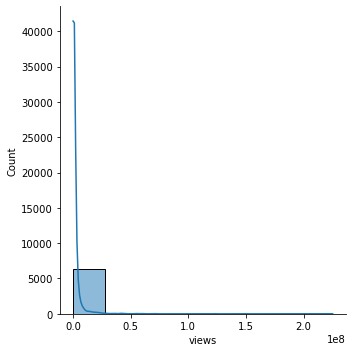

In [260]:
sns.displot(tr, x='views',bins=10^2,kde=True)

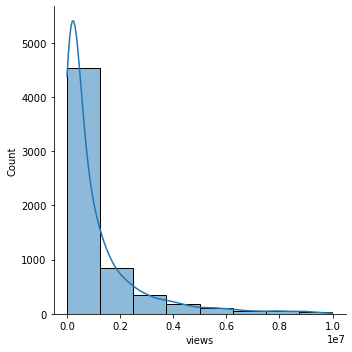

In [262]:
#kita lihat bahwa ternyata kebanyakan data ada di antara 0.25
sns.displot(tr[tr['views'] < 10e6]['views'],bins=10^2,kde=True)

In [263]:
tr[['views']].describe().T

,count,mean,std,min,25%,50%,75%,max
views,6351.0,1.962117e+06,7.060057e+06,559.0,159156.5,518107.0,1473581.5,225211923.0


In [265]:
display(tr[tr['views']<1000])

,index,trending_date,title,channel_title,kategori,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,,,
qg0GdM60syI,160,2017-11-14,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,Education,2017-03-31,27,21:46:53,"90s commercials|""Huffy""",773,2,0,0,https://i.ytimg.com/vi/qg0GdM60syI/default.jpg,False,False,False,Anyone have one of those?
-JVITToppE0,777,2017-11-17,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,Sports,2017-11-13,17,20:41:45,"Oregon|""Ducks""|""college athletics""|""college football""|""college basketball""|""Tracktown USA""|""Track & Field""|""Hayward Field""|""Autzen Stadium""|""NIKE""",704,10,2,5,https://i.ytimg.com/vi/-JVITToppE0/default.jpg,False,False,False,Coach Taggart addresses the media ahead of the Duck's match up this weekend against the Arizona Wildcats. #GoDucks #DoSomething
JNv4w6DFoYs,11329,2018-01-09,OjO Commuter Scooter®- Light Electric Vehicle for the Bike Lane & Beyond!,OjO Commuter Scooter by OjO Electric,Travel & Events,2017-11-10,19,19:18:46,"OjO|""OjO Electric""|""OjO Commuter Scooter""|""Electric Scooter""|""EScooter""|""e-scooter""|""Etransportation""|""transportation""|""eco friendly""|""bike lane""|""e-bike""|""electric""|""all electric transportation""|""LEV""|""Light Electric Vehicle""",917,3,1,0,https://i.ytimg.com/vi/JNv4w6DFoYs/default.jpg,False,False,False,"OjO Commuter Scooter® is the ultimate two-wheel smart scooter from OjO Electric®. The OjO Commuter Scooter® is a bike lane-friendly, zero emissions, clean fun ride for adults. It quickly accelerates up to 20 MPH and a distance of 25 miles on a single charge. Whether commuting or enjoying a leisurely ride, OjO will forever change the way people travel."
TKMXw1YI5S4,12371,2018-01-16,"UR EEOC Complainants Press Conference (5pm Jan 11, 2018)",University of Rochester EEOC Complainants,People & Blogs,2018-01-11,22,22:55:37,"University of Rochester|""UR sexual harassment scandal""|""EEOC Complaint""|""Ann Olivarius""|""Richard Aslin""|""Elissa Newport""|""Celeste Kidd""|""Jessica Cantlon""|""Keturah Bixby""|""Steven Piantadosi""|""Benjamin Hayden""|""Sarah Heilbronner""|""Bradford Mahon""|""McAllister Olivarius""|""Jef McAllister""|""#hangoutsonair""|""Hangouts On Air""|""#hoa""",988,12,5,3,https://i.ytimg.com/vi/TKMXw1YI5S4/default.jpg,False,False,False,"University of Rochester EEOC Complainants, represented by Ann Olivarius of McAllister Olivarius, will respond to the results of the UR investigation live from the Strathallen in Rochester, NY at 5pm on Thursday, January 11, 2018."
zeQaJGkFyqQ,12716,2018-01-18,"Raw: 3 South Carolina Deputies, 1 Officer Shot",Associated Press,News & Politics,2018-01-16,25,12:16:44,"news|""associated press""|""ap""|""ap online""|""associated press style""|""breaking news""|""latest news""|""business""|""finance""|""politics""|""local news""|""commentary""|""reports""|""current affairs""|""top news""|""headlines""|""news today""|""charlotte""|""north carolina""|""united states""|""north america""|""south carolina""|""national""|""regional (ap video-us only""|""charlotte police shooting""|""raw""|""south""|""carolina""|""deputies""|""officer""|""shot""",748,9,0,0,https://i.ytimg.com/vi/zeQaJGkFyqQ/default.jpg,True,False,False,"Three deputies and one police officer were shot and wounded in northern South Carolina early Tuesday. State police say a suspect was also wounded. The wounded officers were taken to a hospital in Charlotte, North Carolina. (Jan. 16)\n\nSubscribe for more Breaking News: http://smarturl.it/AssociatedPress\r\nGet updates and more Breaking News here: http://smarturl.it/APBreakingNews\r\n\r\nThe Associated Press is the essential global news network, delivering fast, unbiased news from every corner of the world to all media platforms and formats.\r\nAP’s commitment to independent, comprehensive journalism has deep roots. Founded in 

Dari histogram ini dapat disimpulkan bahwa mayoritas video yang trending angka viewsnya berada pada angka kurang dari 2000 view dengan minimal 559. Ditampilkan juga video dengan jumlah view terbanyak yang menarik untuk dianalisis lebih lanjut.

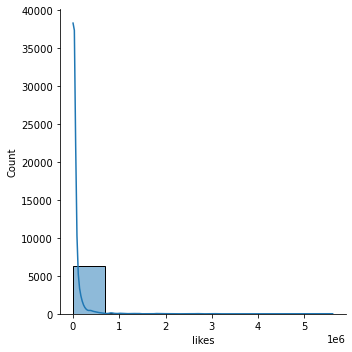

In [266]:
sns.displot(tr, x='likes',bins=10^2,kde=True)

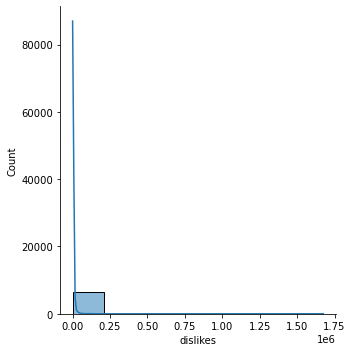

In [267]:
sns.displot(tr, x='dislikes',bins=10^2,kde=True)

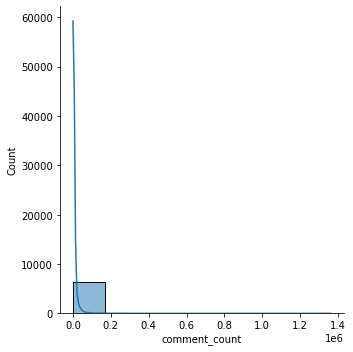

In [268]:
sns.displot(tr, x='comment_count',bins=10^2,kde=True)

In [ ]:
###Dari sini yang bisa dipelajari adalah keeempat variabel numberik tidak terdistribusi normal
####hal ini bisa dilihat dari visualisasi plot. semuanya memperlihatkan positive skewed. Posisi Mean dan median sangat berjauhan
##### Terjadi ketimpangan yang sangat jauh. Ada video yang memang memiliki jumlah viewwer, likes dan comment count yang jomplang dengan viedo lainnya

Dari sini yang bisa dipelajari adalah keeempat variabel numberik tidak terdistribusi normal. Hal ini bisa dilihat dari visualisasi plot dan nilai uji statistik. semuanya memperlihatkan positive skewed. Mean dan median sangat jauh letaknya. Terjadi ketimpangan yang sangat jauh antar entitas video, Ada video yang memang memiliki jumlah viewer, likes dan comment count yang tinggi dan jomplang dengan viedo lainnya yang memiliki views, comment & likes yang sedikit. Hasil analisa ini akan membantu untuk mengetahui langkah apa yang akan diambil dalam uji korelasi.

## Uji Korelasi 
Karena variabel numerik tidak terdistribusi normal, maka dalam mengetahui korelasi antar variabel menggunakan metode **Spearman**.

In [ ]:
#menggunakan Spearman method
kolom_num = ['views', 'likes', 'dislikes', 'comment_count']
kor = tr[kolom_num].corr(method='spearman')
kor

,views,likes,dislikes,comment_count
views,1.000000,0.872626,0.857857,0.817307
likes,0.872626,1.000000,0.811052,0.874711
dislikes,0.857857,0.811052,1.000000,0.849684
comment_count,0.817307,0.874711,0.849684,1.000000


Dari uji korelasi ini terlihat korelasi yang kuat antar variabel. Korelasi terkuat ada pada hubungan antara likes & views (0.872626). Hubungan diantaranya adalah hubungan kuat-positif. 

## Analisis durasi sebuah video trending per-kategori 

In [269]:
my_df_full = df.reset_index().sort_values('trending_date').set_index('video_id')

In [270]:
fre_df = pd.DataFrame(my_df_full.groupby([my_df_full.index,'kategori']).count()['title'].sort_values(ascending=False)).reset_index()
fre_df.head(), fre_df.tail()

(      video_id              kategori  title
 0  j4KvrAUjn6c  Entertainment         30   
 1  MAjY8mCTXWk  Music                 29   
 2  r-3iathMo7o  Science & Technology  29   
 3  NBSAQenU2Bk  Film & Animation      29   
 4  8h--kFui1JA  Music                 29   ,
          video_id              kategori  title
 6363  YvcIeSfaB3c  Entertainment         1    
 6364  9FVkXIj-wLQ  Howto & Style         1    
 6365  Yxv5EY-JwmU  Entertainment         1    
 6366  9D0eyl7-XQA  Science & Technology  1    
 6367  7Nv1KoqM6vc  Comedy                1    )

In [271]:
fre_df

,video_id,kategori,title
0,j4KvrAUjn6c,Entertainment,30
1,MAjY8mCTXWk,Music,29
2,r-3iathMo7o,Science & Technology,29
3,NBSAQenU2Bk,Film & Animation,29
4,8h--kFui1JA,Music,29
...,...,...,...
6363,YvcIeSfaB3c,Entertainment,1
6364,9FVkXIj-wLQ,Howto & Style,1
6365,Yxv5EY-JwmU,Entertainment,1
6366,9D0eyl7-XQA,Science & Technology,1


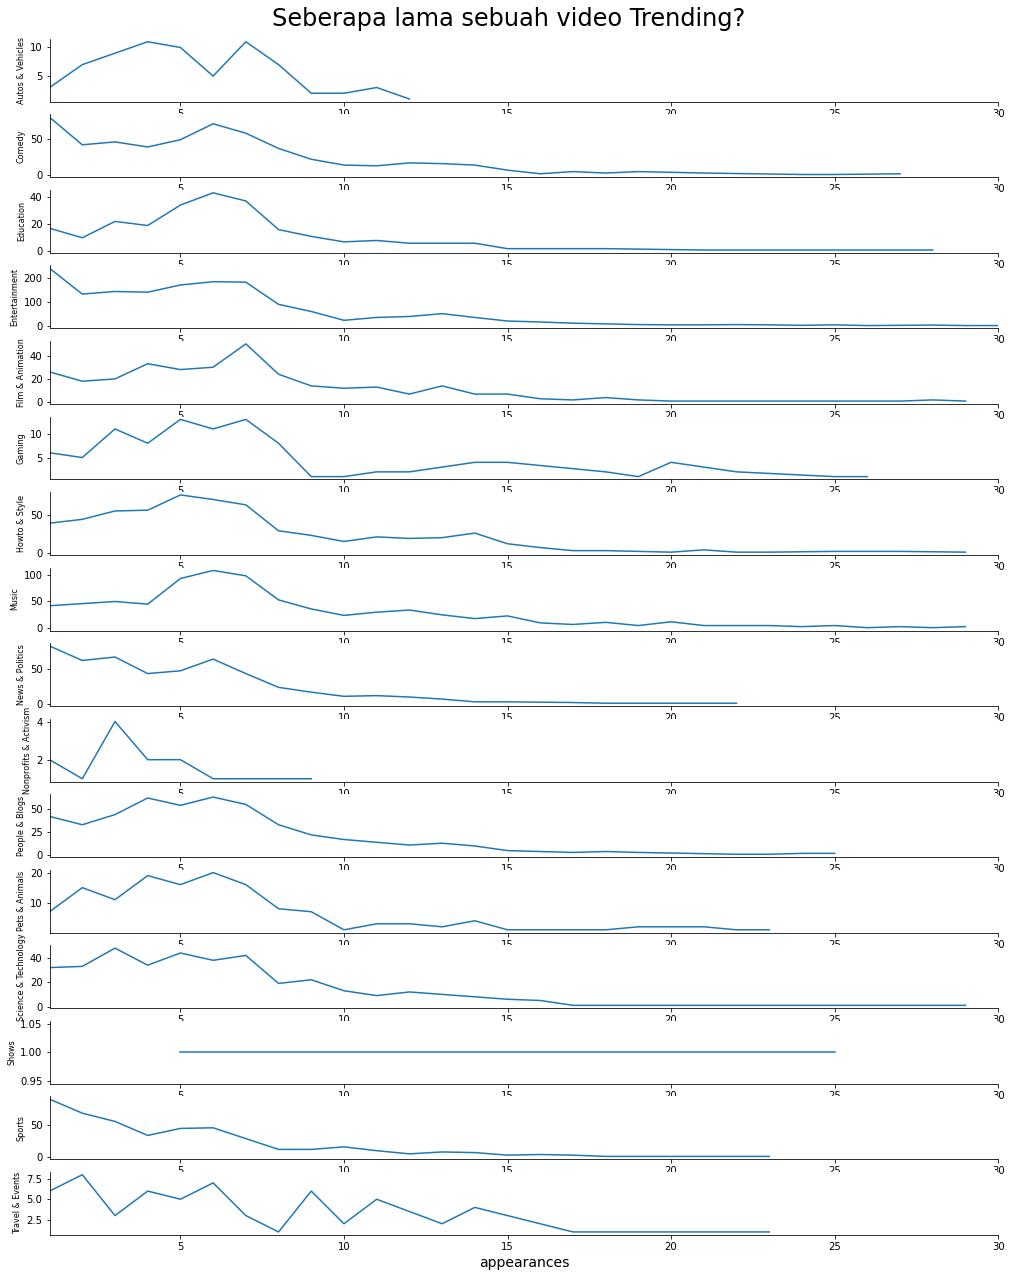

In [280]:
video_list,max_list = list(),list()
listKategori = tr.groupby(['kategori']).count().index

for k in listKategori:
    video_list.append(fre_df[fre_df['kategori']==k]['title'].value_counts().sort_index())
    max_list.append(max(fre_df[fre_df['kategori']==k]['title'].value_counts().sort_index().index))

fig, [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15] = plt.subplots(nrows=16,figsize=(17, 22))
st = fig.suptitle("Seberapa lama sebuah video Trending?", fontsize=24)
st.set_y(0.9)
for i, pt in enumerate([ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]):
    pt.plot(video_list[i].index, video_list[i])
    pt.spines['right'].set_visible(False)
    pt.spines['top'].set_visible(False)
    pt.set_xlabel("appearances",fontsize=14)
    pt.set_ylabel(listKategori[i],fontsize=8)
    pt.axes.set_xlim(1, max(max_list))

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)

Terlihat dari grafik yang divisualisasikan bahwa sebuah video dari kategori Entertaiment muncul lebih lama pada trending dengan apperance hampir 30 hari. Beberapa video dari kategori lain juga memiliki performa yang mirip seperti Science & Tech, Music dan How to& Style

##Karakteristik Video yang Trending

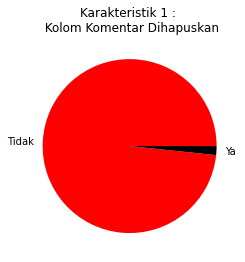

In [284]:
x = tr["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[x[False], x[True]], labels=['Tidak', 'Ya'], 
           colors=['Red', 'Black'])
_ = ax.axis()
_ = ax.set_title('Karakteristik 1 : \n Kolom Komentar Dihapuskan')

In [59]:
tr[tr["comments_disabled"]==True]['views'].count()/len(tr)*100

1.653282947567312

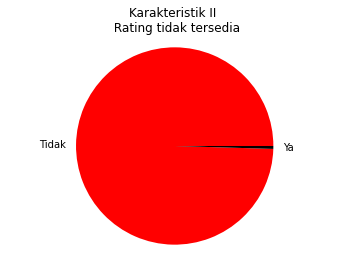

In [285]:
value_counts = tr["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['Tidak', 'Ya'], 
            colors=['Red', 'Black'])
_ = ax.axis('equal')
_ = ax.set_title('Karakteristik II \n Rating tidak tersedia')

In [286]:
tr[tr["ratings_disabled"]==True]['views'].count()/len(tr)*100

0.47236655644780345

Tidak sampai 2% video yang masuk di trending mematikan kolom komentarnya dan hanya 0.5% video yang ternding mamtikan rating dalam videonya.

##Analisa waktu yang diperlukan untuk mencapai trending.

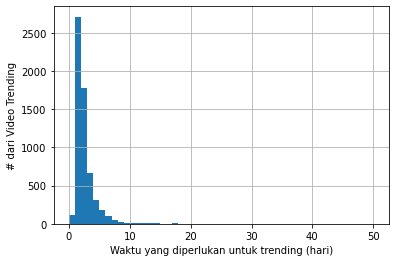

In [287]:
(filtered_tr_b['waktuygDiperlukan'] / pd.Timedelta(hours=24)).hist(bins=(50))
plt.xlabel('Waktu yang diperlukan untuk trending (hari)')
plt.ylabel('# dari Video Trending');

In [288]:
filtered_tr_b['waktuygDiperlukan'].value_counts().head(5)

1 days    2711
2 days    1772
3 days    664 
4 days    315 
5 days    179 
Name: waktuygDiperlukan, dtype: int64

In [289]:
tr_b.sort_values(by='waktuygDiperlukan',ascending=False).head(50)

,index,trending_date,title,channel_title,kategori,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,waktuygDiperlukan
video_id,,,,,,,,,,,,,,,,,,,
MJO3FmmFuh4,16294,2018-02-05,Budweiser - Original Whazzup? ad,dannotv,Entertainment,2006-07-23,24,08:24:11,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,https://i.ytimg.com/vi/MJO3FmmFuh4/default.jpg,False,False,False,"Original Whazzup ad - however, there is a little *glitch* in the middle...sorry.",4215 days
UQtt9I6c-YM,10710,2018-01-06,Kramer vs Kramer-Clou Scene,Livia Giustiniani,Film & Animation,2008-04-05,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman""|""clou""|""scene""",49942,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,3563 days
wFEAoF7RC7Y,2311,2017-11-25,Behind The Sounds: That's Not Me,BehindTheSounds,Music,2008-06-17,10,00:07:56,"Beach|""Boys""|""Brian""|""Wilson""|""Dennis""|""Carl""|""Al""|""Jardine""|""Mike""|""Love""|""Pet""|""Sounds""|""Tony""|""Asher""|""Wrecking""|""Crew""|""Rock""|""Roll""|""Pop""|""Session""|""60's""|""Los""|""Angeles""",86744,469,4,105,https://i.ytimg.com/vi/wFEAoF7RC7Y/default.jpg,False,False,False,A video detailing the creative process behind That's Not Me from The Beach Boys' 1966 Album Pet Sounds.,3448 days
Y8JGfi4MJ8k,2553,2017-11-26,SAOIRSE RONAN - MORONIC (IRONIC),flirppy242,Music,2008-08-07,10,12:16:58,"SAOIRSE|""RONAN""|""MORONIC""|""IRONIC""|""IZZIE""|""COULD""|""NEVER""|""BE""|""WOMAN""|""EL""|""NOVIO""|""DE""|""MI""|""MADRE""",26482,78,1,7,https://i.ytimg.com/vi/Y8JGfi4MJ8k/default.jpg,False,False,False,EL NOVIO DE MI MADRE\r\nI COULD NEVER BE A WOMAN,3398 days
rO_mAQC9bv0,1136,2017-11-19,Amazon.com commercial Xmas 1999Magnetic Whale Art,astroboy1960,Film & Animation,2009-03-10,1,00:27:20,"amazon|""commerical""|""y2k""|""sing""|""along""|""mitch""|""xmas""|""christmas""|""holiday""|""ad""",15382,33,1,10,https://i.ytimg.com/vi/rO_mAQC9bv0/default.jpg,False,False,False,IMHO the best of Amazon's Christmas 1999 ads. Made to look like the old 'Sing Along With Mitch' TV show. Sorry for the poor quality (from an old VHS tape),3176 days
2vQ_fnlvvr8,6597,2017-12-16,The Smithereens - Blue Period,misleadingsilhouette,Music,2009-06-08,10,01:55:32,"smithereens|""Pat""|""DiNizio""|""Jim""|""Babjak""|""Mike""|""Mesaros""|""Dennis""|""Diken""|""Belinda""|""Carlisle""",45096,287,9,59,https://i.ytimg.com/vi/2vQ_fnlvvr8/default.jpg,False,False,False,music video,3113 days
tYFYoLEO0dM,12740,2018-01-18,The Cranberries - Dreams (Music Video HQ),CrossKut316,Music,2009-09-18,10,15:36:33,"The|""Cranberries""|""Dreams""|""(Music""|""Video""|""HQ)""",113672,617,2,44,https://i.ytimg.com/vi/tYFYoLEO0dM/default.jpg,False,False,False,,3044 days
c_KdAO6MqiM,11562,2018-01-12,TimRollins part1,GrDrtube,Education,2009-09-29,27,16:27:28,"Tim|""Rollins""|""K.O.S.""|""Kids""|""of""|""Survival""|""Art""|""Knowledge""|""Workshop""|""South""|""Bronx""|""NY""|""classic""|""literature""|""art""",14289,42,0,8,https://i.ytimg.com/vi/c_KdAO6MqiM/default.jpg,False,False,False,"Documentaire in seven parts:Tim Rollins and his collaborators, high school students from the South Bronx, NY, typically make works based on classic literature. He discovered that his students responded to art - art taught his way, not the way it is usually taught in public schools. Some of Rollins' students became a group of regulars who participated in an after-school and weekend program called the Art of Knowledge Workshop. The students named themselves K.O.S. which stands for Kids of Survival. What we're doing changes people's conception about who can make art, how art is made, who can learn and what's possible, because a lot of these kids had been written off by the school system. This is our revenge.",3027 days
-37nIo_tLnk,8480,2017-12-26,Christmas Day 2000,vnbreyes,Sports,2009-12-15,17,23:26:32,"

Bila dilihat, mayoritas sebuah video untuk mancapai ternding berkisar antara 1-2 hari. Dan tidak ada yang lebih dari 50 hari. Hal ini penting untuk membuat strategi dalam lifecycle sebuah video. Akan lebih disarankan untuk sebuah video di upload secara berkala untuk menambah peluang untuk selalu berada dalam trending. Terutama bagi karya dengan biaya produksi dan berkualitas tinggi untuk memotong menjadi part-part tertentu. Sebagai contoh dalam karya dokumenter yang proses produksinya bisa bertahun-tahun dan durasi videonya tergolong lama. bisa dipecah dalam beberapa video berbeda. Misalnya, film dokumenter yang berdurasi 2,5 jam dibagi menjadi 3-5 bagian berdasarkan topik atau subjek bahasan yang berbeda.

In [177]:
#Channel Prospect untuk collab
ch.agg = tr[['views','channel_title','kategori','likes','title']].groupby(by=['kategori','channel_title'],group_keys=True).mean()

In [178]:
ch.sort_values('views',ascending=False).head(25)

views         likes
kategori         channel_title                                  
Music            ChildishGambinoVEVO  2.252119e+08  5.023450e+06
                 BeckyGVEVO           1.393345e+08  1.425496e+06
                 TheWeekndVEVO        1.225449e+08  1.427436e+06
                 LuisFonsiVEVO        1.020126e+08  2.376636e+06
                 Cardi B              9.425451e+07  1.816753e+06
                 MalumaVEVO           7.357084e+07  8.342810e+05
                 DrakeVEVO            6.063581e+07  9.949860e+05
People & Blogs   Kylie Jenner         5.611196e+07  0.000000e+00
Film & Animation Selena Gomez         5.486391e+07  9.223550e+05
Music            ArianaGrandeVevo     5.091159e+07  1.097980e+06
Entertainment    YouTube Spotlight    5.051834e+07  1.056350e+06
                 FoxStarHindi         4.468477e+07  7.948285e+05
Music            Daddy Yankee         4.180384e+07  6.288610e+05
                 The Weeknd           4.160456e+07  6.702030e+05
                 CalvinHarrisVEVO     3.433590e+07  4.596803e+05
                 Ed Sheeran           3.380348e+07  1.079161e+06
People & Blogs   David Dobrik         3.362781e+07  2.032463e+06
Music            ZaynVEVO             3.323559e+07  9.775430e+05
Film & Animation Disney•Pixar         3.189862e+07  4.083907e+05
Music            TaylorSwiftVEVO      3.055897e+07  1.019202e+06
                 ibighit              3.019482e+07  2.438628e+06
                 Bruno Mars           2.939603e+07  9.742640e+05
                 AbrahamMateoVEVO     2.907571e+07  3.044690e+05
                 CelineDionVEVO       2.703915e+07  5.644930e+05
                 shakiraVEVO          2.514263e+07  6.556640e+05

In [208]:
chgg = tr[['views','channel_title','kategori','likes','title']].groupby(by=['kategori','channel_title']).agg({'views':sum})
sdf = chgg['views'].groupby('kategori', group_keys=False).nlargest(3)
sdf

kategori               channel_title                         
Autos & Vehicles       Ram Trucks                                27538194 
                       HyundaiUSA                                17218952 
                       Jeep                                      11135294 
Comedy                 The Tonight Show Starring Jimmy Fallon    84220904 
                       Lele Pons                                 66021396 
                       Hannah Stocking                           58092218 
Education              Kurzgesagt – In a Nutshell                26365925 
                       The King of Random                        20804752 
                       Tom Scott                                 17989895 
Entertainment          Marvel Entertainment                      203882552
                       YouTube Spotlight                         151555017
                       Sony Pictures Entertainment               131258914
Film & Animation       20th Century Fo

Terlihat beberapa channel dengan viewer tertinggi dari masing masing kategori yang memiliki prospek dalam meningkatkan viewer karena telah memiliki basis penonton.

#Kesimpulan dan Saran

##Kesimpulan
Dari sebanyak 40949 data video Trending dengan waktu observasi berkala 251 hari, Terdapat 6351 video yang berbeda dan didominasi dari kategori Entertaiment.

Korelasi antara views dengan interaksi user(comment, like & dislikes) memiliki korelasi yang kuat

Video dengan performa paling tinggi dalam hal konsistensi untuk muncul dalam trending berasal dari kelompok Entertaiment, Music, Howto & Style dan Science and Technology.

Karakteristik video yang trending adalah memiliki interaksi dengan user yang tinggi. Tercatat tidak sampai 1,7% video yang trending tidak memiliki interaksi dengan user(ratings, comment etc.)

Video yang tengah trending memakan waktu 2-3 setelah di upload dan tidak lebih dari 50 hari. Hal ini dikuatkan dengan statement dari pihak google sebagai penyedia layanan youtube bahwa video temperature merupakan salah satu hal yang mempengaruhi.

Berdasarkan penelitian terdahulu, kolaborasi antar channel memiliki dampak yang signifikan terhadap kenaikan subsriber dan view. Ada beberapa channel yang berpotensi tinggi akan memberikan dampak positif bila dilakukan kolaborasi

##Rekomendasi 
1. Lebih fokus dalam meproduksi kategori Entertaiment, Music dan Howto&Style. Berdasarkan data, selain lebih diminati, memiliki kans untuk bertahan dalam trending lebih lama.
2. Memperhatikan kuantitas video. Video temperature menjadi salah satu kunci dalam trending. Sehingga, daripada mengeluarkan 1 video dengan durasi yang sangat panjang. akan lebih baik untuk memecahnya dalam beberapa video.
3. Mengupayakan untuk update secara terjadwal. Video yang trending tidak lebih dari 50 hari. 
untuk rekomendasi 2-3, Sebagai contoh, suatu karya dokumenter dengan durasi 2-4 jam dapat dipecah menjadi beberapa video dengan durasi 15-30 menit saja.
4. Berkolaborasi dengan channel-channel yang terlebih dahulu sudah settle dan memiliki basis penonton.
5. Tidak mematikan interaksi user terhadap video yang dibuat. Selalu nyalakan kolom komentar dan rating. Jika perlu, encourage penonton untuk memberikan opininya dalam kolom komentar.
